# Lab 7: Interference and Diffraction

Shreya Parjan

10/22/18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
%matplotlib inline
import matplotlib.patches as mpatches

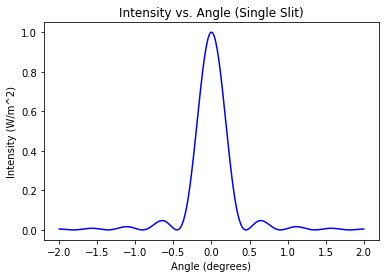

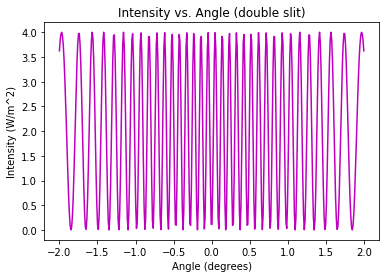

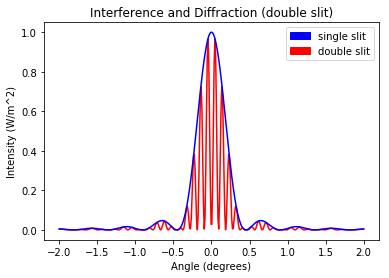

In [4]:
I0 = 1
l = 632.8e-6 #mm
a = .08 #mm

d = .25 #mm
V0 = .5 #mV 
ssw = .08 #mm (single slit width)
sd = .25 #interslit distance (mm)
d = 438 #mm

theta = np.linspace (-2,2,400)
ang1 = (np.pi*a*np.sin(theta*(np.pi/180)))/l
I = I0*((np.sin(ang1)/ang1))**2

ang2 = ((2*np.pi*d)/l)*np.sin(theta*(np.pi/180))
I1 = 4*I0*(np.cos(ang2/2)**2)

ang3 = np.pi*d*np.sin(theta*(np.pi/180))/l
I2 = I0*(np.cos(ang3)**2)*(np.sin(ang1)/ang1)**2

plt.plot (theta, I, 'b')
plt.title ('Intensity vs. Angle (Single Slit)')
plt.xlabel ('Angle (degrees)')
plt.ylabel ('Intensity (W/m^2)')
plt.show()

plt.plot (theta, I1, 'm')
plt.title ('Intensity vs. Angle (double slit)')
plt.xlabel ('Angle (degrees)')
plt.ylabel ('Intensity (W/m^2)')
plt.show()

plt.plot (theta, I2, 'r')
plt.plot (theta, I, 'b')
plt.title ('Interference and Diffraction (double slit)')
plt.xlabel ('Angle (degrees)')
plt.ylabel ('Intensity (W/m^2)')
ssPatch = mpatches.Patch(color = 'blue', label = 'single slit')
dsPatch = mpatches.Patch(color = 'red', label = 'double slit')
plt.legend(handles = [ssPatch, dsPatch])
plt.show()

In [12]:
ss = np.loadtxt('Lab7_SingleSlit_V_by_X.txt')
ds = np.loadtxt('Lab7_DoubleSlit_V_by_X.txt')
#print ('single slit:', single_slit_data)
#print('double slit:', double_slit_data)

V1 = ss[:,0]/1000 #all rows in first column contain voltage data
p1 = ds[:,1] #all rows in 2nd column contain sensor position data
#print (single_slit_data)

V2 = ds[:,0]/1000 #all rows in first column contain voltage data
p2 = ds[:,1]#all rows in 2nd column contain sensor position data
#print (double_slit_data)


### Analysis:

In [13]:
#pos1 = pos1 - 7
#pos2 = pos2 - 7

In [14]:
print('max voltage for single slit:', V1.argmax())
print('max voltage for double slit:', V2.argmax())

max voltage for single slit: 14
max voltage for double slit: 47


In [15]:
print('position at max voltage for single slit:', pos1[14])
print('position at max voltage for double slit:', pos2[47])

pos1 = pos1- pos1[14]
pos2 = pos2 - pos2[47]

print (pos1)

position at max voltage for single slit: 7.0
position at max voltage for double slit: 9.4
[-7.  -6.5 -6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5
  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8. ]


In [16]:
theta1 = np.arctan (pos1/dpd)

theta2 = np.arctan (pos2/dpd)

print (theta1)

[-0.01598037 -0.01483909 -0.01369777 -0.01255642 -0.01141503 -0.01027361
 -0.00913217 -0.0079907  -0.00684921 -0.0057077  -0.00456618 -0.00342464
 -0.0022831  -0.00114155  0.          0.00114155  0.0022831   0.00342464
  0.00456618  0.0057077   0.00684921  0.0079907   0.00913217  0.01027361
  0.01141503  0.01255642  0.01369777  0.01483909  0.01598037  0.01712161
  0.01826281]


In [17]:
def Intensity(x, I_0, a):
    alpha = np.pi*a*np.sin(theta1)/wvlength
    I = I_0*(np.sinc(alpha/np.pi))**2
    
    return (I_0*(np.sinc(alpha/np.pi))**2)

In [18]:
guess = np.array([1.25, .08])

popt,pcov = scipy.optimize.curve_fit(Intensity, theta1, V1, p0 = guess)
print('best-fit parameters:', popt)
print('covariance matrix:')
print(pcov)

popt_uncertainties = np.sqrt(np.diag(pcov))
print('uncertainties:', popt_uncertainties)

best-fit parameters: [1.74067353 0.07519923]
covariance matrix:
[[2.52594968e-03 5.87337298e-05]
 [5.87337298e-05 5.07606712e-06]]
uncertainties: [0.05025883 0.00225301]


In [19]:
best_fit = Intensity (theta1, popt[0], popt[1])

Text(0,0.5,'Voltage (mV)')

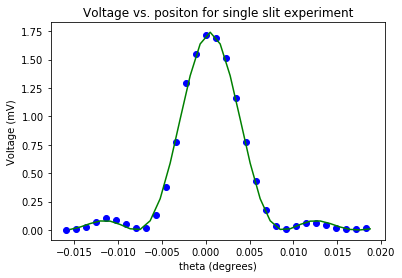

In [20]:
plt.plot (theta1, V1, 'bo')
plt.plot (theta1 + .0005, best_fit, 'g')
plt.title ('Voltage vs. positon for single slit experiment')
plt.xlabel ('theta (degrees)')
plt.ylabel ('Voltage (mV)')

Text(0,0.5,'log Voltage (V)')

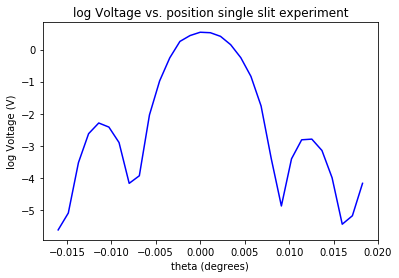

In [21]:
plt.plot (theta1, np.log(V1), 'b')
plt.title ('log Voltage vs. position single slit experiment')
plt.xlabel ('theta (degrees)')
plt.ylabel ('log Voltage (V)')

My data seems symmetric

In [22]:
def Intensity2(x, a, d, I_0):
    alpha = np.pi*a*np.sin(theta2)/wvlength
    Beta = ((np.pi*d)/(wvlength))*np.sin(theta2)
    
    return(I_0*(np.cos(Beta))**2*(np.sinc(alpha/np.pi)**2))

In [23]:
guess = np.array([.08, .25, 1.25])

popt,pcov = scipy.optimize.curve_fit(Intensity2, theta2, V2, p0 = guess)
print('best-fit parameters:', popt)
print('covariance matrix:')
print(pcov)

popt_uncertainties = np.sqrt(np.diag(pcov))
print('uncertainties:', popt_uncertainties)

best-fit parameters: [0.07258975 0.23462382 0.43131819]
covariance matrix:
[[7.54759069e-06 9.37012466e-09 2.23907879e-05]
 [9.37012466e-09 5.56132553e-06 2.13424406e-08]
 [2.23907879e-05 2.13424406e-08 2.49537408e-04]]
uncertainties: [0.00274729 0.00235825 0.01579675]


In [24]:
best_fit2 = Intensity2 (theta2, popt[0], popt[1], popt[2])

Text(0,0.5,'Voltage (V)')

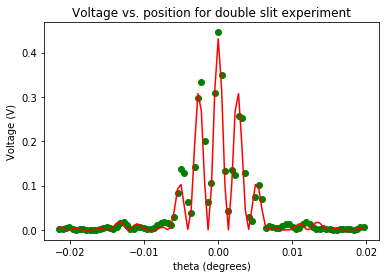

In [25]:
plt.plot (theta2, V2, 'go')
plt.plot (theta2, best_fit2, 'r')
plt.title ('Voltage vs. position for double slit experiment')
plt.xlabel ('theta (degrees)')
plt.ylabel ('Voltage (V)')

Text(0,0.5,'log Voltage (V)')

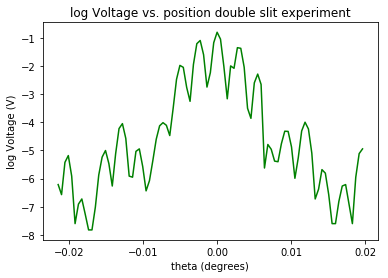

In [26]:
plt.plot (theta2, np.log(V2), 'g')
plt.title ('log Voltage vs. position double slit experiment')
plt.xlabel ('theta (degrees)')
plt.ylabel ('log Voltage (V)')

My data seems less symmetric than for the single slit, but there are still elements of symmetry here, especially in the middle of the graph. Between positions 0 and 5 millimeters should be more symmetric with those between 12.5 and 17.5, so I think this data may not be as good as I would like.

## Conclusion

It looks like I have pretty good data! For single slit diffraction, I used a slit width of .08 mm, and my fit to my data gave me .075 +/- .002 mm, which is close to what I expected it to be. For the double slit, I used a slit width of .08 mm and a slit separation distance of .25 mm, and with my fit my data gave me a slit width of .073 +/- .003 and a slit separation distance of .234 +/- .002, which is close to what I expected it to be. 